# Exercício Aulas 9 e 10

Igor Costa D'Oliveira - 11391446

Wesley Freitas Bernardino Araujo - 11808411

##Configuranções da Máquina

In [2]:
#versao3-colab.py Para Colab
#Imprime versao de Tensorflow, Keras e Keras dentro do Tensorflow
#Tambem imprime se GPU esta funcionando, versao de SO, CPU e RAM
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# Devido a bug, pode ser necessario colocar o comando abaixo,
# quando da erro "Failed to get convolution algorithm"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow as tf
import keras
import sys; import cv2
print("Versao python3:",sys.version)
print("Versao de tensorflow:",tf.__version__)
print("Versao de Keras independente:",keras.__version__)
print("Versao de Keras dentro de tensorflow:",tf.keras.__version__)
print("Versao cv2:",cv2.__version__)
os.system("nvcc --version | grep release")
print()
gpu=tf.test.gpu_device_name()
if gpu=="":
 print("Computador sem GPU.")
else:
 print("Computador com GPU:",tf.test.gpu_device_name())
 from tensorflow.python.client import device_lib
 devices=device_lib.list_local_devices()
 print("Dispositivos:",[x.physical_device_desc for x in devices if x.physical_device_desc!=""])
 !cat /usr/include/cudnn.h | grep CUDNN_MAJOR -A 2
print()
!lsb_release -a | grep "Description" #imprime qual é o sistema operacional
!cat /proc/cpuinfo | grep -E "model name" #especificações de CPU
!cat /proc/meminfo | grep "Mem" #especificações de RAM
print()
import torch;
print("Versao pytorch: ",torch.__version__);
print("GPU disponivel em pytorch: ",torch.cuda.is_available());
!df -H


Versao python3: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
Versao de tensorflow: 2.12.0
Versao de Keras independente: 2.12.0
Versao de Keras dentro de tensorflow: 2.12.0
Versao cv2: 4.7.0

Computador sem GPU.

No LSB modules are available.
Description:	Ubuntu 20.04.6 LTS
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
MemTotal:       13294256 kB
MemFree:         8255524 kB
MemAvailable:   11681376 kB

Versao pytorch:  2.0.1+cu118
GPU disponivel em pytorch:  False
Filesystem      Size  Used Avail Use% Mounted on
overlay         116G   26G   90G  23% /
tmpfs            68M     0   68M   0% /dev
shm             6.2G     0  6.2G   0% /dev/shm
/dev/root       2.1G  1.1G  999M  52% /usr/sbin/docker-init
tmpfs           6.9G  107k  6.9G   1% /var/colab
/dev/sda1        44G   28G   16G  63% /etc/hosts
tmpfs           6.9G     0  6.9G   0% /proc/acpi
tmpfs           6.9G     0  6.9G   0% /proc/scsi
tmpfs           6.9G     0  6.9G   0% /sys/firmwar

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/"
! [ ! -d "lixo" ] && mkdir lixo
%cd "lixo"
arq=open("lixo.txt","w")
arq.write("Testando arquivo texto.\n")
arq.close()
arq=open("lixo.txt","r")
st=arq.readline()
print("Linha lida:",st)
arq.close()

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/MyDrive/lixo
Linha lida: Testando arquivo texto.



In [4]:
import numpy as np
v=np.empty((3,4),dtype=np.uint8)
print(type(v))
print(len(v.shape))
print(v.shape)
print(v.dtype)

<class 'numpy.ndarray'>
2
(3, 4)
uint8


##Regressão de Keras

In [23]:
#regression.py - grad2023
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import numpy as np

#Modelo de rede
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(2, activation='linear'))
sgd=optimizers.SGD(learning_rate=1)
model.compile(optimizer=sgd,loss='mse')

# Gera dado artificial
AX = np.matrix('0.9 0.1; 0.1 0.9',dtype='float32')
AY = np.matrix('0.1 0.9; 0.9 0.1',dtype='float32')

# As alternativas sao batch_size 2 ou 1
model.fit(AX, AY, epochs=120, batch_size=2, verbose=2)

QX = np.matrix('0.9 0.1; 0.1 0.9; 0.8 0.0; 0.2 0.9',dtype='float32')
print(QX)

QP=model.predict(QX)
print(QP)


Epoch 1/120
1/1 - 1s - loss: 0.3886 - 503ms/epoch - 503ms/step
Epoch 2/120
1/1 - 0s - loss: 0.2278 - 13ms/epoch - 13ms/step
Epoch 3/120
1/1 - 0s - loss: 0.1864 - 9ms/epoch - 9ms/step
Epoch 4/120
1/1 - 0s - loss: 0.1762 - 6ms/epoch - 6ms/step
Epoch 5/120
1/1 - 0s - loss: 0.1715 - 6ms/epoch - 6ms/step
Epoch 6/120
1/1 - 0s - loss: 0.1682 - 6ms/epoch - 6ms/step
Epoch 7/120
1/1 - 0s - loss: 0.1654 - 9ms/epoch - 9ms/step
Epoch 8/120
1/1 - 0s - loss: 0.1629 - 10ms/epoch - 10ms/step
Epoch 9/120
1/1 - 0s - loss: 0.1607 - 11ms/epoch - 11ms/step
Epoch 10/120
1/1 - 0s - loss: 0.1586 - 10ms/epoch - 10ms/step
Epoch 11/120
1/1 - 0s - loss: 0.1566 - 6ms/epoch - 6ms/step
Epoch 12/120
1/1 - 0s - loss: 0.1546 - 9ms/epoch - 9ms/step
Epoch 13/120
1/1 - 0s - loss: 0.1527 - 11ms/epoch - 11ms/step
Epoch 14/120
1/1 - 0s - loss: 0.1509 - 9ms/epoch - 9ms/step
Epoch 15/120
1/1 - 0s - loss: 0.1490 - 14ms/epoch - 14ms/step
Epoch 16/120
1/1 - 0s - loss: 0.1470 - 12ms/epoch - 12ms/step
Epoch 17/120
1/1 - 0s - loss: 0

[[0.9 0.1]
 [0.1 0.9]
 [0.8 0. ]
 [0.2 0.9]]
1/1 [==============================] - 0s 65ms/step
[[0.0995824  0.8994982 ]
 [0.90038407 0.10046381]
 [0.13667133 0.8531257 ]
 [0.8203777  0.18340874]]


##Classificador Adulto/Criança/Bebe

In [20]:
#abc1.py - grad2023
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import numpy as np
import sys

model = Sequential();
model.add(Dense(3, activation='sigmoid', input_dim=1))
model.add(Dense(3, activation='sigmoid'))
sgd=optimizers.SGD(learning_rate=1);
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

ax = np.matrix('4; 15; 65; 5; 18; 70 ',dtype="float32")
ax=2*(ax/100-0.5) #-1 a +1
ay = np.matrix('0 1 0; 0 0 1; 1 0 0; 0 1 0; 0 0 1; 1 0 0',dtype="float32")


model.fit(ax, ay, epochs=200, batch_size=2, verbose=2)
qx = np.matrix('16; 3; 75 ',dtype="float32")
qx=2*(qx/100-0.5) #-1 a +1

qy = np.matrix('0 0 1; 0 1 0; 1 0 0',dtype="float32")

teste = model.evaluate(qx,qy)
print("Custo e acuracidade de teste:",teste)
qp=model.predict(qx)
print("Classificacao de teste:\n",qp)
qp = qp.argmax(axis=1)
print("Rotulo de saida:\n",qp)

#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='abc1.png', show_shapes=True)
model.summary()

(6, 1)
(6, 3)


##Classificador - Lição de casa obrigatória

### O seguinte programa baixa o BD no seu diretório atual e o descompacta

In [7]:
url='http://www.lps.usp.br/hae/apostila/noisynote.zip'
import os; nomeArq=os.path.split(url)[1]
if not os.path.exists(nomeArq):
 print("Baixando o arquivo",nomeArq,"para diretorio default",os.getcwd())
 os.system("wget -nc -U 'Firefox/50.0' "+url)
else:
 print("O arquivo",nomeArq,"ja existe no diretorio default",os.getcwd())
print("Descompactando arquivos novos de",nomeArq)
os.system("unzip -u "+nomeArq)


Baixando o arquivo noisynote.zip para diretorio default /content/drive/MyDrive/lixo
Descompactando arquivos novos de noisynote.zip


0

### O seguinte código lê as matrizes ax, ay, qx e qy

In [51]:
import numpy as np

def le(nomearq):
 with open(nomearq,"r") as f:
  linhas=f.readlines()
 linha0=linhas[0].split()
 nl=int(linha0[0]); nc=int(linha0[1])
 a=np.empty((nl,nc),dtype=np.float32)
 for l in range(nl):
  linha=linhas[l+1].split()
  for c in range(nc):
    a[l,c]=np.float32(linha[c])
 return a

ax = le("ax.txt"); ay = le("ay.txt")
qx = le("qx.txt"); qy = le("qy.txt")

In [33]:
print("Treinamento: Dimensões da Entrada: ", ax.shape, "Dimensões da Saída: ", ay.shape)
print("Teste: Dimensões da Entrada: ", qx.shape, "Dimensões da Saída: ", qy.shape)

Treinamento: Dimensões da Entrada:  (686, 7) Dimensões da Saída:  (686, 1)
Teste: Dimensões da Entrada:  (686, 7) Dimensões da Saída:  (686, 1)


In [56]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import sys

model = Sequential();
model.add(Dense(1, activation='sigmoid', input_dim=7))
model.add(Dense(1, activation='sigmoid'))
sgd=optimizers.SGD(learning_rate=0.05);
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

model.fit(ax, ay, epochs=10000, batch_size=200, verbose=2)
teste = model.evaluate(qx,qy)

print("\nCusto e acuracidade de teste:",teste)
qp=model.predict(qx)
print("\nClassificacao de teste:\n",qp)
qp = qp.argmax(axis=1)
print("\nRotulo de saida:\n",qp)

model.summary()

A saída de streaming foi truncada nas últimas 5000 linhas.
4/4 - 0s - loss: 0.0055 - accuracy: 0.9956 - 13ms/epoch - 3ms/step
Epoch 7504/10000
4/4 - 0s - loss: 0.0055 - accuracy: 0.9956 - 14ms/epoch - 3ms/step
Epoch 7505/10000
4/4 - 0s - loss: 0.0055 - accuracy: 0.9956 - 13ms/epoch - 3ms/step
Epoch 7506/10000
4/4 - 0s - loss: 0.0054 - accuracy: 0.9956 - 19ms/epoch - 5ms/step
Epoch 7507/10000
4/4 - 0s - loss: 0.0055 - accuracy: 0.9942 - 15ms/epoch - 4ms/step
Epoch 7508/10000
4/4 - 0s - loss: 0.0056 - accuracy: 0.9956 - 14ms/epoch - 4ms/step
Epoch 7509/10000
4/4 - 0s - loss: 0.0055 - accuracy: 0.9956 - 13ms/epoch - 3ms/step
Epoch 7510/10000
4/4 - 0s - loss: 0.0054 - accuracy: 0.9956 - 13ms/epoch - 3ms/step
Epoch 7511/10000
4/4 - 0s - loss: 0.0056 - accuracy: 0.9956 - 14ms/epoch - 3ms/step
Epoch 7512/10000
4/4 - 0s - loss: 0.0054 - accuracy: 0.9956 - 15ms/epoch - 4ms/step
Epoch 7513/10000
4/4 - 0s - loss: 0.0053 - accuracy: 0.9956 - 15ms/epoch - 4ms/step
Epoch 7514/10000
4/4 - 0s - loss: 

# Exercício Aulas 7 e 8

Igor Costa D'Oliveira - 11391446

##Segmentar Feijões

In [ ]:
import numpy as np
from sklearn import tree
import sys
import cv2

ax=cv2.imread("ax.png", 1)
ay=cv2.imread("ay.png", 0)

if ax.shape[0]!=ay.shape[0] or ax.shape[1]!=ay.shape[1]:
  sys.exit("Erro: Imagens com dimensoes diferentes");

features=(ax/255).reshape((ax.shape[0]*ax.shape[1],3))
saidas =(ay/255).reshape((ay.shape[0]*ay.shape[1],))
arvore= tree.DecisionTreeClassifier()
arvore= arvore.fit(features, saidas)
qx=cv2.imread("f1.jpg",1)
query=(qx/255).reshape((qx.shape[0]*qx.shape[1],3))
qp=arvore.predict(query)
qp=qp.reshape((qx.shape[0],qx.shape[1]))
cv2.imwrite("f1-dt-py.png",255*qp)

True

In [ ]:
import numpy as np
from sklearn import ensemble
import sys, cv2

ax=cv2.imread("ax.png",1)
ay=cv2.imread("ay.png",0)
if ax.shape[0]!=ay.shape[0] or ax.shape[1]!=ay.shape[1]:
  sys.exit("Erro: Imagens com dimensoes diferentes");

features=(ax/255).reshape((ax.shape[0]*ax.shape[1],3))
saidas =(ay/255).reshape((ay.shape[0]*ax.shape[1],))
clf = ensemble.GradientBoostingClassifier()
clf = clf.fit(features,saidas)
qx = cv2.imread("f1.jpg",1)
query = (qx/255).reshape((qx.shape[0]*qx.shape[1],3))
qp = clf.predict(query)
qp = qp.reshape((qx.shape[0],qx.shape[1]))
cv2.imwrite("f1-bo-py.png",255*qp)

ValueError: ignored

## Mapa de Calor - Obrigatório

In [ ]:
import numpy as np
from sklearn import ensemble
import sys, cv2

# Recebe as imagens janei.pgm e janei-1.pgm como amostras de treinamento (AX, AY) e cria um
# filtro pelo aprendizado de máquina
ax=cv2.imread("lax.bmp",1)
ay=cv2.imread("lay.bmp",0)
if ax.shape[0]!=ay.shape[0] or ax.shape[1]!=ay.shape[1]:
  sys.exit("Erro: Imagens com dimensoes diferentes");

features=(ax/255).reshape((ax.shape[0]*ax.shape[1],3))
saidas =(ay/255).reshape((ay.shape[0]*ax.shape[1],))
clf = ensemble.GradientBoostingClassifier(learning_rate=0.01)
clf.fit(features,saidas)

# Aplica o filtro aprendido na imagem julho.pgm (QX) gerando uma imagem semelhante a julhop1.pgm (QP).
qx = cv2.imread("lqx.bmp", 1)
query = (qx/255).reshape((qx.shape[0]*qx.shape[1],3))
qp = clf.predict(query)
qp2 = qp.reshape((qx.shape[0], qx.shape[1]))
cv2.imwrite("julho-p1.png",255*qp2)

True

# Exercício Aulas 5 e 6

Igor Costa D'Oliveira - 11391446

### Redimensionamento de imagem usando interpolação

Python:
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation ] ] ] ]) → dst
Exemplo:
b=cv2.resize(a, (512,512))


In [ ]:
# vizinho.py - pos2022
# Especifica fatores de ampliacao
import cv2, sys
import numpy as np

if len(sys.argv)!=5:
  print("vizinho: Muda resolucao de imagem usando interpolacao vizinho+px.");
  print("vizinho ent.pgm sai.pgm fatorl fatorc");
  sys.exit()

a=cv2.imread(sys.argv[1],0);

if a is None:
  print("Erro leitura",sys.argv[1])
  sys.exit()

fatorl=float(sys.argv[3]); fatorc=float(sys.argv[4])
nl=round(a.shape[0]*fatorl); nc=round(a.shape[1]*fatorc)
b=np.empty((nl,nc),np.uint8)
for l in range(b.shape[0]):
  for c in range(b.shape[1]):
    b[l,c] = a[int(l/fatorl),int(c/fatorc)];
cv2.imwrite(sys.argv[2],b);


vizinho: Muda resolucao de imagem usando interpolacao vizinho+px.
vizinho ent.pgm sai.pgm fatorl fatorc


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Rotação de imagem

In [ ]:
//rotacao.cpp grad2020
#include <cekeikon.h>
int main(int argc, char** argv)
{ if (argc!=4) {
 printf("rotacao ent.pgm sai.pgm graus\n");
 erro("Erro: Numero de argumentos invalido");
 }
 double graus; sscanf(argv[3],"%lf",&graus);
 double radianos=deg2rad(graus);
 double co=cos(radianos);
 double se=sin(radianos);
 ImgXyb<GRY> a; le(a,argv[1]);
 a.centro(a.rows/2,a.cols/2); a.backg=255;
 ImgXyb<GRY> b(a.rows,a.cols);
 b.centro(b.rows/2,b.cols/2); b.backg=255;
 for (int xb=b.minx; xb<=b.maxx; xb++)
 for (int yb=b.miny; yb<=b.maxy; yb++) {
 int xa=cvRound(xb*co+yb*se);
 int ya=cvRound(-xb*se+yb*co);
 b(xb,yb)=a(xa,ya);
 }
 imp(b,argv[2]);
}


### Perpectiva de Imagem - Exercício 1

In [ ]:
from IPython.core.magic import observe
import cv2
import numpy as np
import sys

original = cv2.imread("quadrado1.png")
print(original.shape[0], original.shape[1])

x = []; y = []
x.append([0,324]);x.append([54,155]);x.append([585,155]);x.append([629,324])
y.append([16,0]);y.append([630,0]);y.append([14,479]);y.append([630,479])

input_pts = np.float32([x[0], x[1], x[2], x[3]])
output_pts = np.float32([y[0], y[1], y[2], y[3]])

m = cv2.getPerspectiveTransform(input_pts,output_pts);
b = cv2.warpPerspective(original, m, [480, 640], flags=cv2.INTER_LINEAR);

m=m.linalg.inv() ;
o = cv2.warpPerspective(b, m,[480, 640], flags=cv2.INTER_LINEAR);

cv2.imwrite("mediamov_py.png",o)




480 640


AttributeError: ignored

In [ ]:
 Mat_<double> m=getPerspectiveTransform(src,dst);
 cout << m << endl;
 //Verifica se a transformacao esta fazendo o que queremos
 Mat_<double> v=(Mat_<double>(3,1) << -22,479,1);
 Mat_<double> w=m*v;
 cout << w << endl;
 cout << w(0)/w(2) << " " << w(1)/w(2) << endl;

 //Corrige a perspectiva
 Mat_<COR> a; le(a,"ka0.jpg");
 Mat_<COR> b;
 warpPerspective(a,b,m,a.size());
 imp(b,"ka1.jpg");
 //Refaz a perspectiva
 m=m.inv();
 warpPerspective(b,a,m,a.size());
 imp(a,"ka2.jpg");
}

### Aprendizado de Máquina

In [ ]:
#matriz.py
#Linux$ python3 matriz.py
#Windows> python matriz.py
import numpy as np
A = np.matrix("1 2 3; 4 5 6; 7 8 9",dtype=np.float32)
print("N_linhas=%d N_colunas=%d N_elementos=%d"%(A.shape[0],A.shape[1],A.size))
print("Conteudo de A:")
print(A)
print("A[1,2]=%.0f"%A[1,2])
A=np.ravel(A)
print("A[4]=%.0f"%A[4])

N_linhas=3 N_colunas=3 N_elementos=9
Conteudo de A:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
A[1,2]=6
A[4]=5


###Classificação de Flor Iris - Vizinho mais próximo

In [ ]:
#iris_nn.py
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
def le(nomearq):
 with open(nomearq,"r") as f:
 linhas=f.readlines()
 linha0=linhas[0].split()
 nl=int(linha0[0]); nc=int(linha0[1])
 a=np.empty((nl,nc),dtype=np.float32)
 for l in range(nl):
 linha=linhas[l+1].split()
 for c in range(nc):
 a[l,c]=np.float32(linha[c])
 return a
### main
ax=le("ax.txt"); ay=le("ay.txt")
qx=le("qx.txt"); qy=le("qy.txt")
vizinho = neighbors.KNeighborsClassifier(n_neighbors=1, weights="uniform", algorithm="brute")
vizinho.fit(ax,ay.ravel())
qp = vizinho.predict(qx)
erros=0;
for i in range(qp.shape[0]):
 if qp[i]!=qy[i]: erros+=1
print("Erros=%d/%d. Pct=%1.3f%%\n"%(erros,qp.shape[0],100.0*erros/qp.shape[0]))
#https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/
fig=plt.figure(figsize=(12, 12), dpi=80);
for i in range(ax.shape[0]):
 if ay[i]==0: plt.plot(ax[i,0], ax[i,1], 'ro');
 elif ay[i]==1: plt.plot(ax[i,0], ax[i,1], 'go');
 elif ay[i]==2: plt.plot(ax[i,0], ax[i,1], 'bo');
for i in range(qx.shape[0]):
 if qy[i]==0: plt.plot(qx[i,0], qx[i,1], 'rx');
 elif qy[i]==1: plt.plot(qx[i,0], qx[i,1], 'gx');
 elif qy[i]==2: plt.plot(qx[i,0], qx[i,1], 'bx');
minx = min( ax[:, 0].min()-1, qx[:, 0].min()-1 )
maxx = max( ax[:, 0].max()+1, qx[:, 0].max()+1 )
miny = min( ax[:, 1].min()-1, qx[:, 1].min()-1 )
maxy = max( ax[:, 1].max()+1, qx[:, 1].max()+1 )
gridx = np.arange(minx, maxx, 0.005)
gridy = np.arange(miny, maxy, 0.002)
xx, yy = np.meshgrid(gridx, gridy)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = vizinho.predict(grid)
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.tight_layout(); plt.show(); fig.savefig("iris_nn.png")

###Classificação de Flor Iris - Árvore de Decisão

In [ ]:
#iris_dt2.py
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
def le(nomearq):
 with open(nomearq,"r") as f:
 linhas=f.readlines()
 linha0=linhas[0].split()
 nl=int(linha0[0]); nc=int(linha0[1])
 a=np.empty((nl,nc),dtype=np.float32)
 for l in range(nl):
 linha=linhas[l+1].split()
 for c in range(nc):
 a[l,c]=np.float32(linha[c])
 return a
### main
ax=le("ax.txt"); ay=le("ay.txt")
qx=le("qx.txt"); qy=le("qy.txt")
arvore= tree.DecisionTreeClassifier()
arvore= arvore.fit(ax, ay)
qp=arvore.predict(qx)
erros=0;
for i in range(qp.shape[0]):
 if qp[i]!=qy[i]: erros+=1
print("Erros=%d/%d. Pct=%1.3f%%\n"%(erros,qp.shape[0],100.0*erros/qp.shape[0]))
fig=plt.figure(figsize=(8,6))
tree.plot_tree(arvore,filled=True,fontsize=10)
plt.tight_layout(); plt.show(); fig.savefig("iris_dt2a.png")
#https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/
fig=plt.figure(figsize=(12, 12), dpi=80); #plt.axis([0, 100, 0, 100])
for i in range(ax.shape[0]):
 if ay[i]==0: plt.plot(ax[i,0], ax[i,1], 'ro');
 elif ay[i]==1: plt.plot(ax[i,0], ax[i,1], 'go');
 elif ay[i]==2: plt.plot(ax[i,0], ax[i,1], 'bo');
for i in range(qx.shape[0]):
 if qy[i]==0: plt.plot(qx[i,0], qx[i,1], 'rx');
 elif qy[i]==1: plt.plot(qx[i,0], qx[i,1], 'gx');
 elif qy[i]==2: plt.plot(qx[i,0], qx[i,1], 'bx');
minx = min( ax[:, 0].min()-1, qx[:, 0].min()-1 )
maxx = max( ax[:, 0].max()+1, qx[:, 0].max()+1 )
miny = min( ax[:, 1].min()-1, qx[:, 1].min()-1 )
maxy = max( ax[:, 1].max()+1, qx[:, 1].max()+1 )
gridx = np.arange(minx, maxx, 0.001)
gridy = np.arange(miny, maxy, 0.0005)
xx, yy = np.meshgrid(gridx, gridy)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = arvore.predict(grid)
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.tight_layout(); plt.show(); fig.savefig("iris_dt2b.png")

### Noisynote - Árvore de Decisão - Exercício 2

Erros=19/686. Pct=2.770%



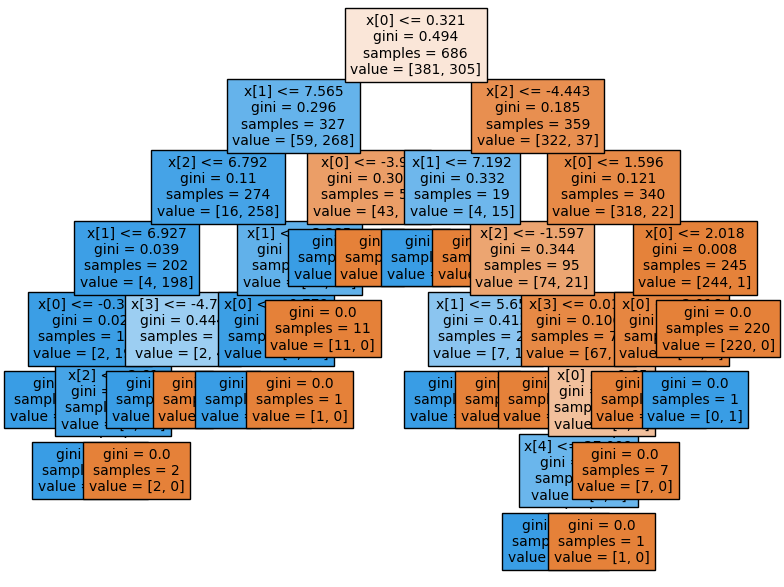

In [ ]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

def le(nomearq):
  with open(nomearq,"r") as f:
    linhas = f.readlines()

  linha0=linhas[0].split()
  nl=int(linha0[0]); nc=int(linha0[1])
  a=np.empty((nl,nc),dtype=np.float32)
  for l in range(nl):
    linha=linhas[l+1].split()
    for c in range(nc):
      a[l,c]=np.float32(linha[c])
  return a

ax=le("ax.txt")
ay=le("ay.txt")
qx=le("qx.txt")
qy=le("qy.txt")

arvore= tree.DecisionTreeClassifier()
arvore= arvore.fit(ax, ay)
qp=arvore.predict(qx)
erros=0

for i in range(qp.shape[0]):
  if qp[i]!=qy[i]:
    erros+=1

print("Erros=%d/%d. Pct=%1.3f%%\n"%(erros,qp.shape[0], 100.0*erros/qp.shape[0]))

fig=plt.figure(figsize=(8,6))
tree.plot_tree(arvore,filled=True,fontsize=10)
plt.tight_layout(); plt.show(); fig.savefig("iris_dt2a.png")
#https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/
fig=plt.figure(figsize=(12, 12), dpi=80); #plt.axis([0, 100, 0, 100])

for i in range(ax.shape[0]):
  if ay[i]==0: plt.plot(ax[i,0], ax[i,1], 'ro');
  elif ay[i]==1: plt.plot(ax[i,0], ax[i,1], 'go');
  elif ay[i]==2: plt.plot(ax[i,0], ax[i,1], 'bo');

for i in range(qx.shape[0]):
  if qy[i]==0: plt.plot(qx[i,0], qx[i,1], 'rx');
  elif qy[i]==1: plt.plot(qx[i,0], qx[i,1], 'gx');
  elif qy[i]==2: plt.plot(qx[i,0], qx[i,1], 'bx');

minx = min( ax[:, 0].min()-1, qx[:, 0].min()-1 )
maxx = max( ax[:, 0].max()+1, qx[:, 0].max()+1 )
miny = min( ax[:, 1].min()-1, qx[:, 1].min()-1 )
maxy = max( ax[:, 1].max()+1, qx[:, 1].max()+1 )

gridx = np.arange(minx, maxx, 0.001)
gridy = np.arange(miny, maxy, 0.0005)
xx, yy = np.meshgrid(gridx, gridy)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = arvore.predict(grid)
zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
plt.tight_layout(); plt.show(); fig.savefig("iris_dt2b.png")

# Exercício Aulas 3 e 4

Igor Costa D'Oliveira - 11391446

### OBRIGATÓRIO: Detectar as 4 ocorrências do urso

In [ ]:
import cv2
import numpy as np
import sys

original = cv2.imread("a.png")
a = np.float32(cv2.imread("a.png", 0))
q = np.float32(cv2.imread("q.png", 0))
w, h = q.shape[::-1]

res = cv2.matchTemplate(a, q, cv2.TM_CCOEFF_NORMED)
res_i = cv2.matchTemplate(a, 1 - q, cv2.TM_CCOEFF_NORMED) # Urso com cores invertidas
loc = np.where(res >= 0.8) # Acima de 0.8 funciona
loc_i = np.where(res_i >= 0.8)

for pt in zip(*loc[::-1]):
  cv2.rectangle(original, pt, (pt[0] + w, pt[1] + h), [0, 255, 0], 1)
for pt in zip(*loc_i[::-1]):
  cv2.rectangle(original, pt, (pt[0] + w, pt[1] + h), [0, 255, 0], 1)

cv2.imwrite("urso_real.png", res*255);
cv2.imwrite("urso_invertido.png", res_i*255);
cv2.imwrite("resultado.png", original);

### OBRIGATÓRIO: Detectar as 4 ocorrências do urso, sem usar borda

In [ ]:
import cv2
import numpy as np
import sys

original = cv2.imread("a.png")
a = np.float32(cv2.imread("a.png", 0))/255.0
q = np.float32(cv2.imread("q.png", 0))/255.0

def matchTemplateSame(a, q, method, backg=0.0):
  p = np.full(a.shape, backg, dtype=np.float32)
  p[(q.shape[0]-1)//2 : ((q.shape[0]-1)//2)+(a.shape[0]-q.shape[0]+1),
    (q.shape[1]-1)//2 : ((q.shape[1]-1)//2)+(a.shape[1]-q.shape[1]+1)] \
     = cv2.matchTemplate(a, q, method);
  return p;

p3 = matchTemplateSame(a, q, cv2.TM_CCOEFF_NORMED);
p3_inv = matchTemplateSame(a, 1 - q, cv2.TM_CCOEFF_NORMED);
p3 = np.uint8(np.clip(255.0*p3, 0, 255));
p3_inv = np.uint8(np.clip(255.0*p3_inv, 0, 255));

for c in range(p3.shape[0]):
  for l in range(p3.shape[1]):
    if p3[c][l] > 180 or p3_inv[c][l] > 180:
      original[c,l] = [0,255,0]

cv2.imwrite("resultado.png", original);

### Exercício de Aula: Diminuir ruído da imagem

In [ ]:
import cv2
import numpy as np

def mediamov(a):
  b=np.empty(a.shape)
  for l in range(a.shape[0]):
    for c in range(a.shape[1]):
      soma=0
      conta=0
      for l2 in range(-1,3):
        for c2 in range(-1,3):
          if 0<=l+l2 and l+l2<a.shape[0] and 0<=c+c2 and c+c2<a.shape[1]:
            soma = soma+a[l+l2,c+c2]
          conta = conta+1
      b[l,c]=round(soma/conta)
  return b

a=cv2.imread("ruido.png",0)
b=mediamov(a)
cv2.imwrite("mediamov_py.png",b)


True

# Exercício Aulas 1 e 2

Igor Costa D'Oliveira - 11391446

##Eliminar Ruído Branco

In [ ]:
import cv2
import queue

def Ruido(a,li,ci):
  b=a.copy()
  q=queue.Queue()
  q.put(li)
  q.put(ci)
  while not q.empty():
    l=q.get()
    c=q.get()
    if all(b[l,c,:]==[0,0,0]):
      b[l,c]=[1,1,1]
      q.put(l-1); q.put(c) #6-acima
      q.put(l+1); q.put(c) #6-abaixo
      q.put(l); q.put(c+1) #6-direita
      q.put(l); q.put(c-1) #6-esquerda
    else:
      b[l,c]=[1,1,1]
  return b;

a = cv2.imread('mickey.bmp', cv2.IMREAD_COLOR)
b = Ruido(a,390,350)
cv2.imwrite('semruido.png',b)

True

##Exercício Extra

## Contagem das Letras

In [ ]:
import cv2
import queue
import time

def contaLetras(a,li,ci):
  b=a.copy()
  q=queue.Queue()
  q.put(li)
  q.put(ci)
  letras = 0
  while not q.empty():
    l=q.get()
    c=q.get()
    if all(b[l,c,:]==[0,0,0]):
      letras += 1
      p=queue.Queue()
      p.put(l)
      p.put(c)
      while not p.empty():
        l=p.get()
        c=p.get()
        if all(b[l,c,:]==[0,0,0]):
          b[l,c]=[0,0,255]
          p.put(l-1); p.put(c) #6-acima
          p.put(l+1); p.put(c) #6-abaixo
          p.put(l); p.put(c+1) #6-direita
          p.put(l); p.put(c-1) #6-esquerda

    elif all(b[l,c,:]==[255,255,255]): #4
      b[l,c]=[0,255,0] #5
      q.put(l-1); q.put(c) #6-acima
      q.put(l+1); q.put(c) #6-abaixo
      q.put(l); q.put(c+1) #6-direita
      q.put(l); q.put(c-1) #6-esquerda

  return b, letras;

tempo_inicial = time.time()

a = cv2.imread('letras.bmp', cv2.IMREAD_COLOR)
b, letras = contaLetras(a, 0, 0)
cv2.imwrite('letras.png',b)

print(f"Quantidade de elementos pretos na imagem: {letras}")
print(f"Tempo de Processamento: {time.time() - tempo_inicial} segundos")

Quantidade de elementos pretos na imagem: 31
Tempo de Processamento: 4.757391929626465 segundos
